# PyCaret 2 Classification Example
* This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
import neptune.new as neptune

# 새로 실험 아이디 얻고 싶을때
#run = neptune.init(project='hakmink/pycaret')
# rerun
run = neptune.init(project='hakmink/pycaret', run='PYCAR-7')

Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/hakmink/pycaret/e/PYCAR-7


In [2]:
# check version
from pycaret.utils import version
version()

'2.2.3'

## Data Repository

In [3]:
from pycaret.datasets import get_data
index = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

In [4]:
from util import write_to_html_file
from neptune.new.types import File


data = get_data('juice')
write_to_html_file(data.head(), title='Sample - Juice Data', filename='sample_data.html')

run['data/sample'].upload('sample_data.html')

data.head()

Id Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0   1       CH             237        1     1.75     1.99    0.00     0.0   
1   2       CH             239        1     1.75     1.99    0.00     0.3   
2   3       CH             245        1     1.86     2.09    0.17     0.0   
3   4       MM             227        1     1.69     1.69    0.00     0.0   
4   5       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

Id Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0   1       CH             237        1     1.75     1.99    0.00     0.0   
1   2       CH             239        1     1.75     1.99    0.00     0.3   
2   3       CH             245        1     1.86     2.09    0.17     0.0   
3   4       MM             227        1     1.69     1.69    0.00     0.0   
4   5       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [5]:
data.groupby('Purchase').size()

Purchase
CH    653
MM    417
dtype: int64

In [6]:
data.dtypes

Id                  int64
Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [7]:
data.groupby('Store7').size()

Store7
No     714
Yes    356
dtype: int64

In [8]:
isna_info = data.isna().describe()

write_to_html_file(isna_info, title='Describe Data - isna', filename='isna.html')

run['data/isna'].upload('isna.html')

In [9]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

In [10]:
setup_info = get_config('display_container')[-1].render()
with open('setup_info.html', 'w') as f:
    f.write(setup_info)
run['setup_info'].upload('setup_info.html')

In [11]:
best_model = compare_models(include = ['dt','rf'])
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [12]:
run["best_model"] = best_model

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


In [13]:
get_config('display_container')[-1]

Model  Accuracy     AUC  Recall   Prec.      F1  \
rf  Random Forest Classifier    0.7874  0.8634  0.7207  0.7249  0.7204   
dt  Decision Tree Classifier    0.7580  0.7470  0.6861  0.6851  0.6840   

     Kappa     MCC  TT (Sec)  
rf  0.5492  0.5515     0.103  
dt  0.4882  0.4897     0.525

In [14]:
write_to_html_file(get_config('display_container')[-1], title='Best Model', filename='best_model_result.html')
run['best_model_comparison'].upload('best_model_result.html')

In [15]:
lightgbm = create_model('lightgbm')

In [16]:
get_config('display_container')[-1]

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8267  0.9033  0.6897  0.8333  0.7547  0.6225  0.6292
1       0.8133  0.9033  0.7931  0.7419  0.7667  0.6114  0.6123
2       0.8267  0.9010  0.7931  0.7667  0.7797  0.6369  0.6371
3       0.7867  0.8733  0.6897  0.7407  0.7143  0.5444  0.5453
4       0.8267  0.9408  0.7586  0.7857  0.7719  0.6322  0.6325
5       0.8667  0.8992  0.8276  0.8276  0.8276  0.7189  0.7189
6       0.7067  0.7894  0.6552  0.6129  0.6333  0.3893  0.3899
7       0.7200  0.8286  0.6429  0.6207  0.6316  0.4059  0.4060
8       0.7568  0.8540  0.6429  0.6923  0.6667  0.4756  0.4764
9       0.8108  0.8634  0.7500  0.7500  0.7500  0.5978  0.5978
Mean    0.7941  0.8756  0.7243  0.7372  0.7296  0.5635  0.5646
SD      0.0487  0.0415  0.0651  0.0720  0.0628  0.1022  0.1025

In [17]:
write_to_html_file(get_config('display_container')[-1], title='LightGBM 10 fold validation', filename='lightgbm_10fold.html')
run['lightgbm_10fold'].upload('lightgbm_10fold.html')

In [18]:
lightgbm = create_model('lightgbm', search_library='scikit-optimize', search_algorithm='bayesian')

In [19]:
lightgbm = create_model('lightgbm', search_library='optuna', search_algorithm='tpe')

In [20]:
run["lightgbm"] = lightgbm

In [21]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp           pycaret.internal.tunable.TunableMLPClassifier  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True

In [22]:
tuned_lightgbm = tune_model(lightgbm)

In [23]:
write_to_html_file(get_config('display_container')[-1], title='LightGBM Hyperparameter tuning', filename='lightgbm_tuned.html')
run['lightgbm_tuned'].upload('lightgbm_tuned.html')
run['tuned_lightgbm'] = tuned_lightgbm


In [24]:
plot_model(tuned_lightgbm, save=True)

'AUC.png'

In [25]:
run["tuned_lightgbm_plot_model_auc"].upload('AUC.png')

In [26]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix', save=True)

'Confusion Matrix.png'

In [27]:
run["tuned_lightgbm_plot_model_confusion_matrix"].upload('Confusion Matrix.png')

In [28]:
plot_model(tuned_lightgbm, plot = 'boundary', save=True)

'Decision Boundary.png'

In [29]:
run["tuned_lightgbm_plot_model_boundary"].upload('Decision Boundary.png')

In [30]:
plot_model(tuned_lightgbm, plot = 'feature', save=True)

'Feature Importance.png'

In [31]:
run["tuned_lightgbm_plot_model_feature_importance"].upload('Feature Importance.png')

In [32]:
interpret_model(tuned_lightgbm, plot='reason', save=True)

In [33]:
run["tuned_lightgbm_plot_model_SHAP_reason"].upload('SHAP reason.html')

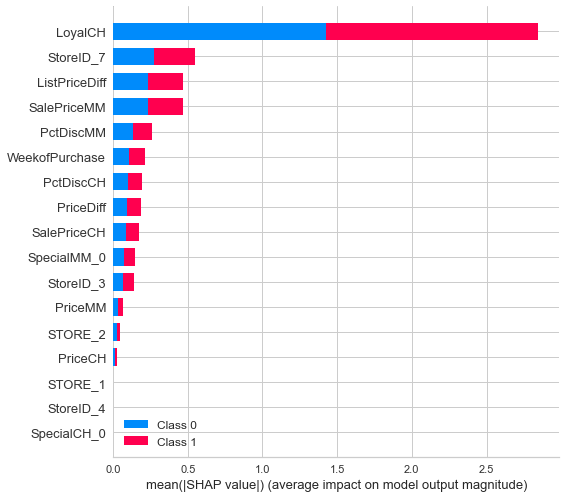

In [34]:
interpret_model(tuned_lightgbm, plot='summary', save=True)

In [35]:
run["tuned_lightgbm_plot_model_SHAP_summary"].upload('SHAP summary.png')

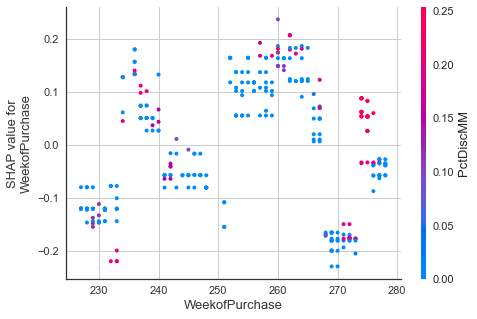

In [36]:
interpret_model(tuned_lightgbm, plot = 'correlation', save=True)

In [37]:
run["tuned_lightgbm_plot_model_SHAP_correlation"].upload('SHAP correlation.png')

In [38]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 200, save=True)

In [39]:
run["tuned_lightgbm_plot_model_SHAP_reason_observation_200"].upload('SHAP reason.html')

In [40]:
best = automl(optimize = 'Recall')

In [41]:
best

LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.296, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.5, n_estimators=30, n_jobs=-1, num_leaves=150,
               objective=None, random_state=123, reg_alpha=0.01, reg_lambda=5,
               search_algorithm='tpe', search_library='optuna', silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
run['automl_optimize_recall'] = best

In [43]:
pred_holdouts = predict_model(tuned_lightgbm)
pred_holdouts.head()

WeekofPurchase  PriceCH  PriceMM   LoyalCH  SalePriceMM  SalePriceCH  \
0           271.0     1.99     2.09  0.600000         1.69         1.89   
1           278.0     2.09     2.09  0.986489         2.09         1.89   
2           255.0     1.89     2.18  0.680000         2.18         1.76   
3           258.0     1.76     2.18  0.320000         2.18         1.76   
4           278.0     1.99     2.18  0.600000         2.18         1.99   

   PriceDiff  PctDiscMM  PctDiscCH  ListPriceDiff  StoreID_3  StoreID_4  \
0      -0.20   0.191388   0.050251           0.10        1.0        0.0   
1       0.20   0.000000   0.095694           0.00        1.0        0.0   
2       0.42   0.000000   0.068783           0.29        0.0        0.0   
3       0.42   0.000000   0.000000           0.42        0.0        0.0   
4       0.19   0.000000   0.000000           0.19        0.0        0.0   

   StoreID_7  SpecialCH_0  SpecialMM_0  STORE_1  STORE_2 Purchase Label  \
0        0.0          0.0          1.0      0.0      0.0       MM    MM   
1        0.0          1.0          1.0      0.0      0.0       CH    CH   
2        0.0          1.0          1.0      0.0      1.0       CH    CH   
3        0.0          1.0          1.0      1.0      0.0       CH    MM   
4        0.0          1.0          1.0      0.0      1.0       CH    CH   

    Score  
0  0.5669  
1  0.9362  
2  0.8731  
3  0.6288  
4  0.6401

In [44]:
write_to_html_file(pred_holdouts.head(), title='Prediction Sample', filename='sample_pred_holdouts.html')
run['data/sample_pred_holdouts'].upload('sample_pred_holdouts.html')



In [45]:
get_config('display_container')[-1]
write_to_html_file(get_config('display_container')[-1], title='LightGBM AutoML for Recall', filename='lightgbm_automl_recall.html')
run['lightgbm_automl_recall'].upload('lightgbm_automl_recall.html')



In [46]:
pred_holdouts

WeekofPurchase  PriceCH  PriceMM   LoyalCH  SalePriceMM  SalePriceCH  \
0             271.0     1.99     2.09  0.600000         1.69         1.89   
1             278.0     2.09     2.09  0.986489         2.09         1.89   
2             255.0     1.89     2.18  0.680000         2.18         1.76   
3             258.0     1.76     2.18  0.320000         2.18         1.76   
4             278.0     1.99     2.18  0.600000         2.18         1.99   
..              ...      ...      ...       ...          ...          ...   
317           233.0     1.69     1.99  0.916114         1.99         1.69   
318           237.0     1.75     1.99  0.086789         1.99         1.75   
319           266.0     1.86     2.13  0.916114         2.13         1.49   
320           238.0     1.79     2.09  0.719675         2.09         1.79   
321           264.0     1.86     2.13  0.492800         2.13         1.49   

     PriceDiff  PctDiscMM  PctDiscCH  ListPriceDiff  StoreID_3  StoreID_4  \
0        -0.20   0.191388   0.050251           0.10        1.0        0.0   
1         0.20   0.000000   0.095694           0.00        1.0        0.0   
2         0.42   0.000000   0.068783           0.29        0.0        0.0   
3         0.42   0.000000   0.000000           0.42        0.0        0.0   
4         0.19   0.000000   0.000000           0.19        0.0        0.0   
..         ...        ...        ...            ...        ...        ...   
317       0.30   0.000000   0.000000           0.30        0.0        0.0   
318       0.24   0.000000   0.000000           0.24        0.0        0.0   
319       0.64   0.000000   0.198925           0.27        0.0        0.0   
320       0.30   0.000000   0.000000           0.30        1.0        0.0   
321       0.64   0.000000   0.198925           0.27        0.0        0.0   

     StoreID_7  SpecialCH_0  SpecialMM_0  STORE_1  STORE_2 Purchase Label  \
0          0.0          0.0          1.0      0.0      0.0       MM    MM   
1          0.0          1.0          1.0      0.0      0.0       CH    CH   
2          0.0          1.0          1.0      0.0      1.0       CH    CH   
3          0.0          1.0          1.0      1.0      0.0       CH    MM   
4          0.0          1.0          1.0      0.0      1.0       CH    CH   
..         ...          ...          ...      ...      ...      ...   ...   
317        0.0          1.0          1.0      1.0      0.0       CH    CH   
318        0.0          1.0          1.0      0.0      1.0       MM    MM   
319        1.0          0.0          1.0      0.0      0.0       CH    CH   
320        0.0          1.0          1.0      0.0      0.0       CH    CH   
321        1.0          0.0          1.0      0.0      0.0       CH    CH   

      Score  
0    0.5669  
1    0.9362  
2    0.8731  
3    0.6288  
4    0.6401  
..      ...  
317  0.9472  
318  0.8773  
319  0.9901  
320  0.8843  
321  0.9243  

[322 rows x 20 columns]

In [47]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
new_data

Id  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0        1             237        1     1.75     1.99    0.00    0.00   
1        2             239        1     1.75     1.99    0.00    0.30   
2        3             245        1     1.86     2.09    0.17    0.00   
3        4             227        1     1.69     1.69    0.00    0.00   
4        5             228        7     1.69     1.69    0.00    0.00   
...    ...             ...      ...      ...      ...     ...     ...   
1065  1066             252        7     1.86     2.09    0.10    0.00   
1066  1067             256        7     1.86     2.18    0.00    0.00   
1067  1068             257        7     1.86     2.18    0.00    0.00   
1068  1069             261        7     1.86     2.13    0.00    0.24   
1069  1070             270        1     1.86     2.18    0.00    0.00   

      SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0             0          0  0.500000         1.99         1.75       0.24   
1             0          1  0.600000         1.69         1.75      -0.06   
2             0          0  0.680000         2.09         1.69       0.40   
3             0          0  0.400000         1.69         1.69       0.00   
4             0          0  0.956535         1.69         1.69       0.00   
...         ...        ...       ...          ...          ...        ...   
1065          0          0  0.587822         2.09         1.76       0.33   
1066          0          0  0.670258         2.18         1.86       0.32   
1067          0          0  0.736206         2.18         1.86       0.32   
1068          0          0  0.588965         1.89         1.86       0.03   
1069          0          0  0.671172         2.18         1.86       0.32   

     Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0        No   0.000000   0.000000           0.24      1  
1        No   0.150754   0.000000           0.24      1  
2        No   0.000000   0.091398           0.23      1  
3        No   0.000000   0.000000           0.00      1  
4       Yes   0.000000   0.000000           0.00      0  
...     ...        ...        ...            ...    ...  
1065    Yes   0.000000   0.053763           0.23      0  
1066    Yes   0.000000   0.000000           0.32      0  
1067    Yes   0.000000   0.000000           0.32      0  
1068    Yes   0.112676   0.000000           0.27      0  
1069     No   0.000000   0.000000           0.32      1  

[1070 rows x 18 columns]

In [48]:
predict_new = predict_model(tuned_lightgbm, data=new_data)
predict_new.head()

Id  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0   1             237        1     1.75     1.99    0.00     0.0          0   
1   2             239        1     1.75     1.99    0.00     0.3          0   
2   3             245        1     1.86     2.09    0.17     0.0          0   
3   4             227        1     1.69     1.69    0.00     0.0          0   
4   5             228        7     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  PctDiscMM  \
0          0  0.500000         1.99         1.75       0.24     No   0.000000   
1          1  0.600000         1.69         1.75      -0.06     No   0.150754   
2          0  0.680000         2.09         1.69       0.40     No   0.000000   
3          0  0.400000         1.69         1.69       0.00     No   0.000000   
4          0  0.956535         1.69         1.69       0.00    Yes   0.000000   

   PctDiscCH  ListPriceDiff  STORE Label   Score  
0   0.000000           0.24      1    CH  0.7069  
1   0.000000           0.24      1    CH  0.5732  
2   0.091398           0.23      1    CH  0.8913  
3   0.000000           0.00      1    MM  0.7346  
4   0.000000           0.00      0    CH  0.9053

In [ ]:
!mlflow ui

[2021-05-14 17:23:47 +0900] [10380] [INFO] Starting gunicorn 20.0.4
[2021-05-14 17:23:47 +0900] [10380] [INFO] Listening at: http://127.0.0.1:5000 (10380)
[2021-05-14 17:23:47 +0900] [10380] [INFO] Using worker: sync
[2021-05-14 17:23:47 +0900] [10382] [INFO] Booting worker with pid: 10382
[2021-05-14 20:40:55 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:10382)
[2021-05-14 20:40:55 +0900] [10382] [INFO] Worker exiting (pid: 10382)
[2021-05-14 20:40:55 +0900] [24888] [INFO] Booting worker with pid: 24888


Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-05-14T11:40:57.077Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-05-14T11:40:57.078Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-05-14T11:40:57.133Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-05-14T11:40:57.134Z


[2021-05-14 21:11:43 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:24888)
[2021-05-14 21:11:43 +0900] [24888] [INFO] Worker exiting (pid: 24888)
[2021-05-14 21:11:43 +0900] [24958] [INFO] Booting worker with pid: 24958
[2021-05-14 21:41:52 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:24958)
[2021-05-14 21:41:52 +0900] [24958] [INFO] Worker exiting (pid: 24958)
[2021-05-14 21:41:52 +0900] [24993] [INFO] Booting worker with pid: 24993
[2021-05-14 22:17:35 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:24993)
[2021-05-14 22:17:35 +0900] [24993] [INFO] Worker exiting (pid: 24993)
[2021-05-14 22:17:35 +0900] [25456] [INFO] Booting worker with pid: 25456
[2021-05-14 23:33:59 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:25456)
[2021-05-14 23:33:59 +0900] [25456] [INFO] Worker exiting (pid: 25456)
[2021-05-14 23:33:59 +0900] [25791] [INFO] Booting worker with pid: 25791
[2021-05-15 01:22:07 +0900] [10380] [CRITICAL] WORKER TIMEOUT (pid:25791)
[2021-05-15 01:22:07 +0900] [25791] [INFO] Worker 